In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["trust_analysis_db"]
collection = db["merged_trust_population"]

In [ ]:
# fetching data from db and converting to df
cursor = collection.find()
data = pd.DataFrame(list(cursor))
data.drop(columns=['_id'], inplace=True)
print(data.head())

In [ ]:
#making sure columns are float and rounded to 2 decimals
trust_columns = [
    'neighbourhood', 
    'government', 
    'scientist', 
    'journalist', 
    'doctor_and_nurses', 
    'philantropist', 
    'traditional_healers'
]
top_50_countries = data.nlargest(50, "population")

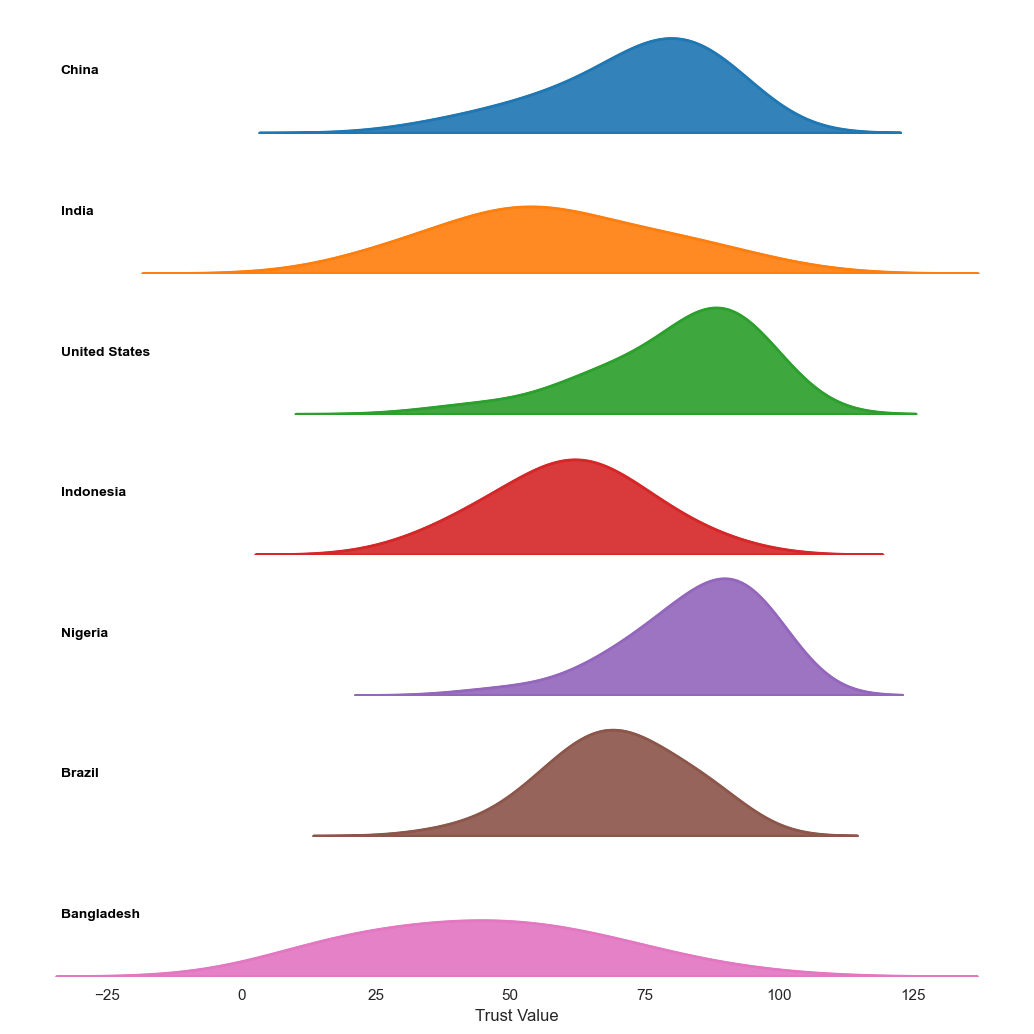

In [77]:
# Reshape the data for visualization
melted_data = top_50_countries.melt(
    id_vars=["country"], 
    value_vars=[
        'neighbourhood', 
        'government', 
        'scientist', 
        'journalist', 
        'doctor_and_nurses', 
        'philantropist', 
        'traditional_healers'
    ], 
    var_name="trust_type", 
    value_name="trust_value"
)

# Set up Seaborn's theme for a Ridge Plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the Ridge Plot
g = sns.FacetGrid(
    melted_data, 
    row="trust_type", 
    hue="trust_type", 
    aspect=7, 
    height=1.5, 
    palette="tab10"
)

# Map the KDE plot with adjusted bandwidth
g.map(
    sns.kdeplot, 
    "trust_value", 
    fill=True, 
    alpha=0.7, 
    linewidth=2,
    bw_adjust=1.5  # Adjust bandwidth to smooth the KDE
)

# Add jitter to the data to separate countries horizontally (optional)
melted_data['trust_value_jittered'] = melted_data['trust_value'] + np.random.uniform(-0.1, 0.1, size=len(melted_data))

# Optional: Only use jitter for better spacing if necessary
g.map(
    sns.kdeplot, 
    "trust_value_jittered", 
    fill=True, 
    alpha=0.7, 
    linewidth=1.5,
    bw_adjust=1.5  # Adjust bandwidth to smooth the KDE
)

# Add country names to the plot
for ax, country in zip(g.axes.flat, melted_data['country'].unique()):
    ax.text(
        0.05, 0.5, country,  # Adjust x position to be closer to the left edge (0.05 instead of 0.5)
        ha="left", va="center", 
        transform=ax.transAxes, 
        fontsize=10, color='black', weight='bold'
    )

# Adjust the aesthetics of the Ridge Plot
g.fig.subplots_adjust(hspace=-0.4)
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="Trust Value")
g.despine(bottom=True, left=True)

# Automatically adjust the layout
plt.tight_layout()

# Display the plot
plt.show()
